# Data Exploration

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

In [2]:
#Read dataset
data = pd.read_excel("D:/tech/skill vertex/ML SV/Assignments/Questions/Major project/amazon_stocks_prices.xlsx")

In [3]:
#first 5 rows
data.head()

,date,close
0,2006-01-01,45.22
1,2006-02-01,38.82
2,2006-03-01,36.38
3,2006-04-01,36.32
4,2006-05-01,34.13


In [4]:
#last 5 rows
data.tail()

,date,close
139,2017-08-01,971.44
140,2017-09-01,968.99
141,2017-10-01,1000.72
142,2017-11-01,1139.81
143,2017-12-01,1168.84


In [5]:
data.shape

(144, 2)

In [6]:
#unique values identification
data.nunique()

date     144
close    144
dtype: int64

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
date     144 non-null datetime64[ns]
close    144 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [8]:
import datetime

In [9]:
# Extracting useful data from date
data["year"]=data.date.dt.year
data["day"]=data.date.dt.day
data["month"]=data.date.dt.month

In [10]:
data["year"]

0      2006
1      2006
2      2006
3      2006
4      2006
       ... 
139    2017
140    2017
141    2017
142    2017
143    2017
Name: year, Length: 144, dtype: int64

In [11]:
#data[["year","day" , "month"]] = data["date"].datetime.

In [12]:
data["day"]

0      1
1      1
2      1
3      1
4      1
      ..
139    1
140    1
141    1
142    1
143    1
Name: day, Length: 144, dtype: int64

In [13]:
data["month"]

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: month, Length: 144, dtype: int64

In [14]:
# Statistical data
data.describe()

,close,year,day,month
count,144.000000,144.000000,144.0,144.000000
mean,299.068889,2011.500000,1.0,6.500000
std,280.564066,3.464102,0.0,3.464102
min,27.800000,2006.000000,1.0,1.000000
25%,82.205000,2008.750000,1.0,3.750000
50%,202.425000,2011.500000,1.0,6.500000
75%,375.427500,2014.250000,1.0,9.250000
max,1168.840000,2017.000000,1.0,12.000000


# Univariate Analysis

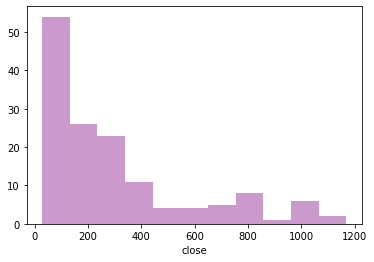

In [15]:
# Data distribution
sns.distplot(data["close"], kde = False, color = "purple")

# Bivariate Analysis

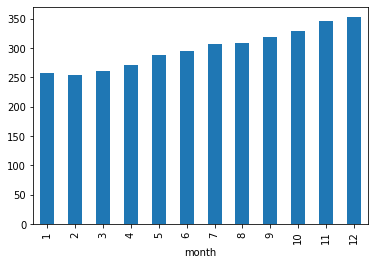

In [16]:
data.groupby("month")["close"].mean().plot.bar()

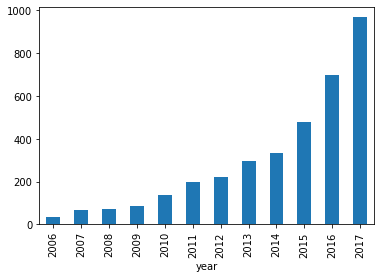

In [17]:
data.groupby("year")["close"].mean().plot.bar()

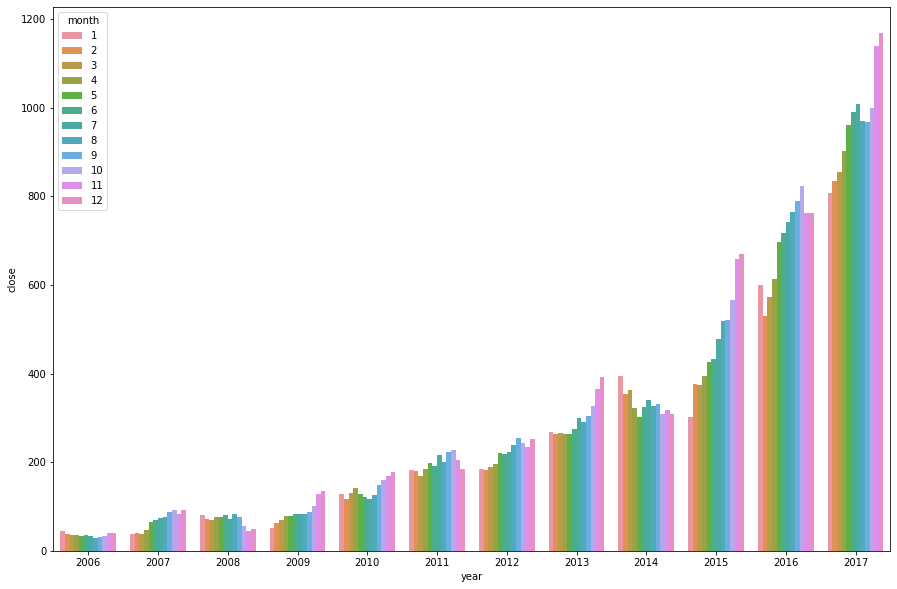

In [18]:
# Relationship between all 3 attributes
fig = plt.figure(figsize =(15, 10))
sns.barplot(x="year",y="close",hue="month",data=data)

# Outlier Identification

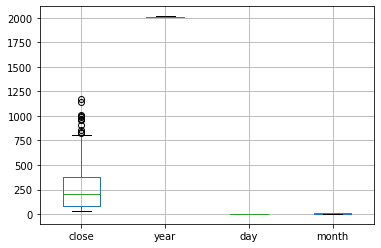

In [19]:
data.boxplot()

In [20]:
data1=data.drop(["date","day"],axis=1)  

In [21]:
data1

,close,year,month
0,45.22,2006,1
1,38.82,2006,2
2,36.38,2006,3
3,36.32,2006,4
4,34.13,2006,5
...,...,...,...
139,971.44,2017,8
140,968.99,2017,9
141,1000.72,2017,10
142,1139.81,2017,11


In [22]:
data1.corr()

,close,year,month
close,1.00000,0.88527,0.11464
year,0.88527,1.00000,0.00000
month,0.11464,0.00000,1.00000


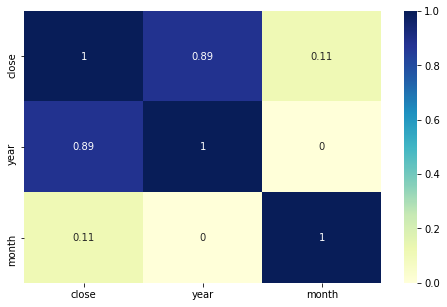

In [23]:
plt.subplots(figsize=(8,5))
ax = sns.heatmap(data1.corr(), cmap="YlGnBu", annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

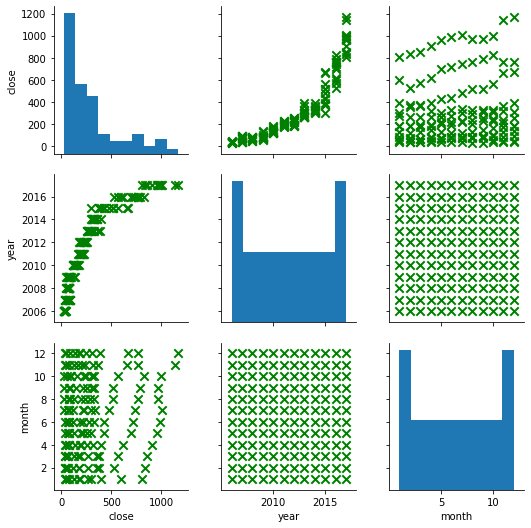

In [24]:
sns.pairplot(data1,markers="x", plot_kws=dict(s=70, color="g", linewidth=2))
plt.show()

# Simple Linear Regressor

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [26]:
x = data1.drop(["close","month"],axis=1)
y = data1["close"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [29]:
x_train

,year
139,2017
99,2014
54,2010
51,2010
98,2014
...,...
133,2017
137,2017
72,2012
140,2017


In [30]:
y_train

139    971.44
99     321.64
54     117.52
51     141.53
98     362.63
        ...  
133    835.75
137    990.44
72     185.03
140    968.99
37      63.43
Name: close, Length: 100, dtype: float64

In [31]:
# Reshape to convert the dataset into 2D.
x_train = np.array(x_train).reshape(-1, 1)

x_test = np.array(x_test).reshape(-1, 1)

In [32]:
x_test.shape

(44, 1)

In [33]:
# normalise the values 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(x_train)
X_test=sc.transform(x_test)

In [34]:
#X_train

In [35]:
#X_test

In [36]:
model = reg.fit(X_train, y_train)

In [37]:
model.coef_

array([264.71232401])

In [38]:
model.intercept_

324.24260000000265

In [39]:
Y_pred = model.predict(X_test)

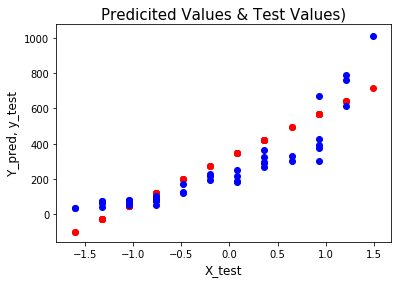

In [40]:
plt.scatter(X_test, Y_pred, c = "r")
plt.scatter(X_test, y_test, c = "b")
plt.xlabel('X_test',size=12)
plt.ylabel('Y_pred, y_test',size=12)
plt.title('Predicited Values & Test Values)',size=15)
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [42]:
mean_absolute_error(y_test, Y_pred)

98.81393874677102

In [43]:
mean_squared_error(y_test, Y_pred)

13922.04104165082

In [44]:
np.sqrt(mean_squared_error(y_test, Y_pred))

117.99169903705439

In [45]:
r2_score(y_test, Y_pred)

0.7208148314399161

In [46]:
reg.score(X_train,y_train)

0.7913442793049914

In [47]:
reg.score(X_test,Y_pred)

1.0

In [48]:
import statsmodels.api as sm

In [49]:
X = X_train
Y = y_train
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     371.7
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           4.05e-35
Time:                        19:25:26   Log-Likelihood:                -633.11
No. Observations:                 100   AIC:                             1270.
Df Residuals:                      98   BIC:                             1275.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        324.2426     13.731     23.614      0.0